# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Padala Sudheer Reddy
Roll Number: 2020101065

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [65]:
import csv
import random
import numpy as np

In [66]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.



 * We want to fit a straight line to the given data so that we can be able to establish an linear relationship between data and the labels which can be represented as 
 $ y = W^TX + b $ 
 * The loss function used is mean squared loss which can be given by $ \\ $
 $ Loss = \frac{\sum{(y_{true}-y_{pred})^2}}{n} $
 * $y_{pred}$ are the values estimated by our linear model. 
 * The model is learned by updating the weights which is done by gradient descent according to
 $ w = w - lr\frac{\partial L}{\partial w} $
 * This ensures that the overall loss is minimized.
 

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

* The best learning rate I got is 0.015

In [67]:
par = np.random.uniform(-2,2,size=5)
sz = len(x_train)
z = np.ones((sz,1))
x_train = np.append(x_train,z, axis=1)

In [68]:
# implement Linear Regression
def Loss(pred,act):
    # Mean Squared error loss
    loss = np.sum((np.subtract(pred,act))**2/sz)
    return loss
def grd(pred,act):
    gr = np.random.rand(5)
    for i in range(5):
        gr[i] = np.sum(2*np.subtract(pred,act)*x_train[:, i]/sz)
    return gr
epochs = 20000
lr = 0.015
for i in range(epochs):
    values = np.dot(x_train,par.T)
    ls = Loss(values,y_train)
    grds = grd(values,y_train)
    par = par - (lr*grds)
    print("Loss =",ls)

Loss = 10.827944331611045
Loss = 9.989420233051666
Loss = 9.219775069547971
Loss = 8.51330322915605
Loss = 7.86477229762347
Loss = 7.269383806666096
Loss = 6.722737238255275
Loss = 6.220797014821788
Loss = 5.759862227687736
Loss = 5.336538876584013
Loss = 4.947714411952935
Loss = 4.590534389014687
Loss = 4.262381058421854
Loss = 3.9608537328576023
Loss = 3.683750782258879
Loss = 3.429053122566445
Loss = 3.194909074110272
Loss = 2.979620476015921
Loss = 2.7816299524420987
Loss = 2.599509235102404
Loss = 2.431948454450079
Loss = 2.2777463191730196
Loss = 2.135801110311713
Loss = 2.005102422425319
Loss = 1.8847235898366022
Loss = 1.7738147411269238
Loss = 1.6715964297665757
Loss = 1.5773537930887938
Loss = 1.4904311957801861
Loss = 1.4102273176959386
Loss = 1.336190649142096
Loss = 1.2678153598246924
Loss = 1.2046375104692812
Loss = 1.146231578685669
Loss = 1.0922072730105785
Loss = 1.0422066112233095
Loss = 0.995901241012439
Loss = 0.9529899828900772
Loss = 0.9131965769178364
Loss = 0.87

Loss = 0.0218980093837274
Loss = 0.021837653743193918
Loss = 0.021777753740744026
Loss = 0.021718304573386506
Loss = 0.021659301493712205
Loss = 0.021600739809234826
Loss = 0.021542614881739683
Loss = 0.021484922126640094
Loss = 0.021427657012341676
Loss = 0.021370815059614006
Loss = 0.021314391840970018
Loss = 0.02125838298005257
Loss = 0.02120278415102857
Loss = 0.021147591077990194
Loss = 0.021092799534363316
Loss = 0.021038405342322958
Loss = 0.02098440437221578
Loss = 0.020930792541989495
Loss = 0.02087756581662892
Loss = 0.02082472020759903
Loss = 0.020772251772294408
Loss = 0.020720156613495497
Loss = 0.020668430878831127
Loss = 0.02061707076024767
Loss = 0.02056607249348437
Loss = 0.02051543235755501
Loss = 0.0204651466742358
Loss = 0.020415211807559293
Loss = 0.020365624163314423
Loss = 0.02031638018855247
Loss = 0.020267476371098957
Loss = 0.020218909239071305
Loss = 0.020170675360402342
Loss = 0.02012277134236943
Loss = 0.020075193831129247
Loss = 0.02002793951125808
Loss = 

Loss = 0.010213631614943085
Loss = 0.010206119233399622
Loss = 0.010198622328353077
Loss = 0.010191140861784036
Loss = 0.010183674795811544
Loss = 0.010176224092692266
Loss = 0.010168788714819642
Loss = 0.01016136862472302
Loss = 0.010153963785066875
Loss = 0.010146574158649908
Loss = 0.01013919970840432
Loss = 0.010131840397394905
Loss = 0.01012449618881833
Loss = 0.01011716704600226
Loss = 0.010109852932404637
Loss = 0.010102553811612864
Loss = 0.010095269647342992
Loss = 0.010088000403439056
Loss = 0.010080746043872187
Loss = 0.010073506532739964
Loss = 0.010066281834265575
Loss = 0.010059071912797148
Loss = 0.010051876732806962
Loss = 0.010044696258890743
Loss = 0.010037530455766962
Loss = 0.010030379288276051
Loss = 0.01002324272137976
Loss = 0.010016120720160428
Loss = 0.01000901324982026
Loss = 0.010001920275680677
Loss = 0.00999484176318161
Loss = 0.009987777677880809
Loss = 0.009980727985453174
Loss = 0.009973692651690107
Loss = 0.009966671642498821
Loss = 0.009959664923901709

Loss = 0.0076448590089701635
Loss = 0.007642386151221198
Loss = 0.007639917974952869
Loss = 0.007637454471086276
Loss = 0.007634995630561239
Loss = 0.007632541444336203
Loss = 0.007630091903388246
Loss = 0.007627646998712989
Loss = 0.007625206721324571
Loss = 0.007622771062255637
Loss = 0.007620340012557232
Loss = 0.007617913563298814
Loss = 0.007615491705568167
Loss = 0.007613074430471406
Loss = 0.007610661729132884
Loss = 0.0076082535926951765
Loss = 0.007605850012319053
Loss = 0.007603450979183393
Loss = 0.00760105648448519
Loss = 0.0075986665194394615
Loss = 0.007596281075279256
Loss = 0.007593900143255559
Loss = 0.007591523714637323
Loss = 0.007589151780711329
Loss = 0.007586784332782246
Loss = 0.007584421362172507
Loss = 0.007582062860222325
Loss = 0.007579708818289612
Loss = 0.007577359227749967
Loss = 0.007575014079996613
Loss = 0.007572673366440378
Loss = 0.007570337078509629
Loss = 0.007568005207650267
Loss = 0.007565677745325624
Loss = 0.007563354683016509
Loss = 0.007561036

Loss = 0.00707794993950693
Loss = 0.007076545227926421
Loss = 0.007075143151830756
Loss = 0.0070737437062277884
Loss = 0.007072346886135083
Loss = 0.00707095268657986
Loss = 0.007069561102599
Loss = 0.00706817212923902
Loss = 0.007066785761556047
Loss = 0.0070654019946158
Loss = 0.0070640208234935735
Loss = 0.0070626422432742255
Loss = 0.0070612662490521436
Loss = 0.007059892835931219
Loss = 0.0070585219990248515
Loss = 0.007057153733455914
Loss = 0.007055788034356738
Loss = 0.007054424896869092
Loss = 0.007053064316144148
Loss = 0.007051706287342498
Loss = 0.0070503508056341
Loss = 0.00704899786619828
Loss = 0.007047647464223698
Loss = 0.007046299594908333
Loss = 0.007044954253459473
Loss = 0.007043611435093678
Loss = 0.0070422711350368
Loss = 0.0070409333485239025
Loss = 0.007039598070799287
Loss = 0.0070382652971164765
Loss = 0.007036935022738162
Loss = 0.007035607242936222
Loss = 0.0070342819529916585
Loss = 0.007032959148194646
Loss = 0.007031638823844439
Loss = 0.0070303209752493

Loss = 0.006749779922702414
Loss = 0.006748989753349072
Loss = 0.006748201061213939
Loss = 0.006747413843525196
Loss = 0.00674662809751627
Loss = 0.006745843820425833
Loss = 0.00674506100949779
Loss = 0.006744279661981264
Loss = 0.006743499775130589
Loss = 0.006742721346205296
Loss = 0.006741944372470112
Loss = 0.006741168851194954
Loss = 0.006740394779654896
Loss = 0.00673962215513018
Loss = 0.006738850974906188
Loss = 0.0067380812362734495
Loss = 0.006737312936527637
Loss = 0.006736546072969525
Loss = 0.006735780642905009
Loss = 0.006735016643645072
Loss = 0.006734254072505817
Loss = 0.006733492926808395
Loss = 0.0067327332038790546
Loss = 0.006731974901049089
Loss = 0.00673121801565485
Loss = 0.006730462545037726
Loss = 0.00672970848654415
Loss = 0.00672895583752556
Loss = 0.00672820459533842
Loss = 0.00672745475734419
Loss = 0.0067267063209093345
Loss = 0.006725959283405276
Loss = 0.006725213642208446
Loss = 0.00672446939470021
Loss = 0.006723726538266903
Loss = 0.00672298507029980

Loss = 0.006570912852633099
Loss = 0.006570456840136186
Loss = 0.0065700016790228655
Loss = 0.006569547367701274
Loss = 0.006569093904582516
Loss = 0.006568641288080687
Loss = 0.006568189516612856
Loss = 0.006567738588599062
Loss = 0.006567288502462304
Loss = 0.006566839256628564
Loss = 0.006566390849526759
Loss = 0.0065659432795887405
Loss = 0.006565496545249336
Loss = 0.0065650506449462884
Loss = 0.0065646055771202885
Loss = 0.006564161340214936
Loss = 0.0065637179326767485
Loss = 0.00656327535295519
Loss = 0.006562833599502602
Loss = 0.006562392670774241
Loss = 0.006561952565228272
Loss = 0.006561513281325734
Loss = 0.006561074817530566
Loss = 0.006560637172309591
Loss = 0.0065602003441325015
Loss = 0.006559764331471869
Loss = 0.006559329132803118
Loss = 0.006558894746604554
Loss = 0.006558461171357319
Loss = 0.006558028405545412
Loss = 0.006557596447655671
Loss = 0.006557165296177788
Loss = 0.0065567349496042735
Loss = 0.006556305406430465
Loss = 0.006555876665154529
Loss = 0.00655

Loss = 0.006402173811003508
Loss = 0.006402032704492141
Loss = 0.006401891861230812
Loss = 0.00640175128072831
Loss = 0.006401610962494318
Loss = 0.006401470906039454
Loss = 0.006401331110875243
Loss = 0.006401191576514103
Loss = 0.006401052302469393
Loss = 0.0064009132882553695
Loss = 0.006400774533387182
Loss = 0.0064006360373809095
Loss = 0.006400497799753503
Loss = 0.006400359820022858
Loss = 0.0064002220977077235
Loss = 0.006400084632327781
Loss = 0.0063999474234036
Loss = 0.006399810470456628
Loss = 0.0063996737730092354
Loss = 0.006399537330584662
Loss = 0.006399401142707037
Loss = 0.0063992652089014
Loss = 0.006399129528693655
Loss = 0.006398994101610604
Loss = 0.0063988589271799165
Loss = 0.00639872400493017
Loss = 0.00639858933439079
Loss = 0.00639845491509211
Loss = 0.006398320746565322
Loss = 0.006398186828342503
Loss = 0.006398053159956601
Loss = 0.006397919740941425
Loss = 0.0063977865708316674
Loss = 0.0063976536491629
Loss = 0.0063975209754715216
Loss = 0.00639738854929

Loss = 0.006365955825312188
Loss = 0.006365882284576289
Loss = 0.0063658088810277
Loss = 0.006365735614410478
Loss = 0.006365662484469171
Loss = 0.006365589490948799
Loss = 0.006365516633594844
Loss = 0.0063654439121532975
Loss = 0.006365371326370584
Loss = 0.006365298875993631
Loss = 0.006365226560769829
Loss = 0.006365154380447028
Loss = 0.006365082334773568
Loss = 0.006365010423498243
Loss = 0.006364938646370325
Loss = 0.006364867003139559
Loss = 0.006364795493556136
Loss = 0.006364724117370735
Loss = 0.006364652874334491
Loss = 0.0063645817641989925
Loss = 0.006364510786716323
Loss = 0.00636443994163899
Loss = 0.006364369228719991
Loss = 0.006364298647712769
Loss = 0.006364228198371239
Loss = 0.006364157880449766
Loss = 0.006364087693703169
Loss = 0.006364017637886739
Loss = 0.0063639477127562195
Loss = 0.006363877918067798
Loss = 0.006363808253578131
Loss = 0.006363738719044321
Loss = 0.006363669314223927
Loss = 0.006363600038874952
Loss = 0.006363530892755876
Loss = 0.00636346187

Loss = 0.0063476238878047
Loss = 0.006347584544076648
Loss = 0.006347545273740777
Loss = 0.006347506076660179
Loss = 0.00634746695269819
Loss = 0.006347427901718414
Loss = 0.006347388923584717
Loss = 0.006347350018161193
Loss = 0.0063473111853122165
Loss = 0.006347272424902404
Loss = 0.006347233736796608
Loss = 0.006347195120859958
Loss = 0.006347156576957834
Loss = 0.00634711810495585
Loss = 0.006347079704719878
Loss = 0.006347041376116044
Loss = 0.006347003119010729
Loss = 0.006346964933270539
Loss = 0.006346926818762367
Loss = 0.006346888775353315
Loss = 0.0063468508029107615
Loss = 0.006346812901302319
Loss = 0.0063467750703958496
Loss = 0.006346737310059461
Loss = 0.006346699620161516
Loss = 0.006346662000570601
Loss = 0.006346624451155572
Loss = 0.0063465869717855145
Loss = 0.006346549562329766
Loss = 0.00634651222265791
Loss = 0.006346474952639754
Loss = 0.00634643775214538
Loss = 0.006346400621045081
Loss = 0.0063463635592094095
Loss = 0.0063463265665091575
Loss = 0.00634628964

Loss = 0.006338623478468943
Loss = 0.006338600924114952
Loss = 0.006338578411833709
Loss = 0.0063385559415467235
Loss = 0.006338533513175664
Loss = 0.006338511126642329
Loss = 0.006338488781868684
Loss = 0.006338466478776833
Loss = 0.00633844421728901
Loss = 0.00633842199732762
Loss = 0.006338399818815189
Loss = 0.006338377681674403
Loss = 0.006338355585828081
Loss = 0.006338333531199197
Loss = 0.006338311517710871
Loss = 0.006338289545286338
Loss = 0.006338267613849016
Loss = 0.006338245723322443
Loss = 0.006338223873630297
Loss = 0.006338202064696413
Loss = 0.006338180296444753
Loss = 0.006338158568799437
Loss = 0.006338136881684711
Loss = 0.0063381152350249605
Loss = 0.006338093628744738
Loss = 0.006338072062768708
Loss = 0.006338050537021696
Loss = 0.006338029051428645
Loss = 0.006338007605914663
Loss = 0.006337986200404977
Loss = 0.006337964834824972
Loss = 0.006337943509100163
Loss = 0.006337922223156189
Loss = 0.006337900976918855
Loss = 0.006337879770314081
Loss = 0.00633785860

Loss = 0.006330603645758057
Loss = 0.006330596051506217
Loss = 0.006330588471420565
Loss = 0.006330580905474694
Loss = 0.006330573353642222
Loss = 0.0063305658158968135
Loss = 0.006330558292212195
Loss = 0.006330550782562141
Loss = 0.006330543286920467
Loss = 0.006330535805261049
Loss = 0.006330528337557798
Loss = 0.006330520883784681
Loss = 0.0063305134439157204
Loss = 0.0063305060179249684
Loss = 0.0063304986057865454
Loss = 0.006330491207474604
Loss = 0.006330483822963362
Loss = 0.006330476452227061
Loss = 0.006330469095240023
Loss = 0.006330461751976591
Loss = 0.006330454422411164
Loss = 0.006330447106518188
Loss = 0.006330439804272177
Loss = 0.006330432515647648
Loss = 0.006330425240619201
Loss = 0.006330417979161483
Loss = 0.00633041073124917
Loss = 0.006330403496857002
Loss = 0.006330396275959748
Loss = 0.006330389068532245
Loss = 0.0063303818745493595
Loss = 0.006330374693986015
Loss = 0.0063303675268171836
Loss = 0.006330360373017865
Loss = 0.006330353232563141
Loss = 0.006330

Loss = 0.006328472475130886
Loss = 0.0063284688563296715
Loss = 0.006328465244278912
Loss = 0.006328461638966005
Loss = 0.006328458040378382
Loss = 0.006328454448503515
Loss = 0.006328450863328865
Loss = 0.006328447284841937
Loss = 0.006328443713030254
Loss = 0.006328440147881376
Loss = 0.006328436589382861
Loss = 0.00632843303752231
Loss = 0.006328429492287332
Loss = 0.006328425953665589
Loss = 0.006328422421644716
Loss = 0.0063284188962124295
Loss = 0.006328415377356413
Loss = 0.0063284118650644115
Loss = 0.006328408359324181
Loss = 0.006328404860123504
Loss = 0.006328401367450167
Loss = 0.00632839788129201
Loss = 0.006328394401636869
Loss = 0.0063283909284726145
Loss = 0.00632838746178715
Loss = 0.00632838400156838
Loss = 0.006328380547804232
Loss = 0.006328377100482686
Loss = 0.006328373659591713
Loss = 0.006328370225119321
Loss = 0.0063283667970535345
Loss = 0.0063283633753824
Loss = 0.006328359960093998
Loss = 0.006328356551176408
Loss = 0.006328353148617766
Loss = 0.006328349752

Loss = 0.006327615929133742
Loss = 0.006327613908118679
Loss = 0.00632761189087359
Loss = 0.006327609877391427
Loss = 0.006327607867665184
Loss = 0.006327605861687841
Loss = 0.006327603859452425
Loss = 0.006327601860951937
Loss = 0.006327599866179418
Loss = 0.006327597875127916
Loss = 0.006327595887790488
Loss = 0.0063275939041601975
Loss = 0.006327591924230145
Loss = 0.00632758994799341
Loss = 0.006327587975443122
Loss = 0.00632758600657239
Loss = 0.006327584041374352
Loss = 0.006327582079842168
Loss = 0.006327580121968986
Loss = 0.006327578167747987
Loss = 0.006327576217172362
Loss = 0.006327574270235305
Loss = 0.00632757232693003
Loss = 0.006327570387249765
Loss = 0.0063275684511877395
Loss = 0.006327566518737213
Loss = 0.006327564589891453
Loss = 0.006327562664643715
Loss = 0.006327560742987314
Loss = 0.006327558824915533
Loss = 0.006327556910421686
Loss = 0.006327554999499111
Loss = 0.0063275530921411294
Loss = 0.006327551188341103
Loss = 0.006327549288092393
Loss = 0.006327547391

Loss = 0.0063271535933331026
Loss = 0.006327152434751178
Loss = 0.006327151278330459
Loss = 0.006327150124066897
Loss = 0.006327148971956487
Loss = 0.006327147821995205
Loss = 0.006327146674179032
Loss = 0.0063271455285039795
Loss = 0.006327144384966049
Loss = 0.006327143243561262
Loss = 0.006327142104285621
Loss = 0.00632714096713517
Loss = 0.006327139832105937
Loss = 0.006327138699193964
Loss = 0.006327137568395313
Loss = 0.006327136439706026
Loss = 0.006327135313122184
Loss = 0.006327134188639848
Loss = 0.006327133066255096
Loss = 0.006327131945964031
Loss = 0.0063271308277627345
Loss = 0.006327129711647308
Loss = 0.006327128597613869
Loss = 0.006327127485658525
Loss = 0.006327126375777402
Loss = 0.006327125267966629
Loss = 0.006327124162222356
Loss = 0.006327123058540711
Loss = 0.006327121956917857
Loss = 0.006327120857349954
Loss = 0.006327119759833164
Loss = 0.006327118664363658
Loss = 0.006327117570937624
Loss = 0.0063271164795512475
Loss = 0.006327115390200728
Loss = 0.00632711

Loss = 0.006326884584791435
Loss = 0.006326883928013335
Loss = 0.006326883272460378
Loss = 0.006326882618130277
Loss = 0.006326881965020742
Loss = 0.0063268813131295175
Loss = 0.006326880662454317
Loss = 0.006326880012992873
Loss = 0.006326879364742926
Loss = 0.006326878717702211
Loss = 0.0063268780718684706
Loss = 0.006326877427239465
Loss = 0.00632687678381293
Loss = 0.006326876141586637
Loss = 0.006326875500558341
Loss = 0.006326874860725807
Loss = 0.006326874222086806
Loss = 0.006326873584639115
Loss = 0.006326872948380506
Loss = 0.0063268723133087556
Loss = 0.006326871679421664
Loss = 0.0063268710467170135
Loss = 0.006326870415192592
Loss = 0.006326869784846214
Loss = 0.006326869155675668
Loss = 0.006326868527678772
Loss = 0.006326867900853327
Loss = 0.006326867275197147
Loss = 0.006326866650708057
Loss = 0.0063268660273838795
Loss = 0.006326865405222443
Loss = 0.00632686478422157
Loss = 0.006326864164379105
Loss = 0.006326863545692877
Loss = 0.006326862928160743
Loss = 0.00632686

Loss = 0.006326693521402679
Loss = 0.006326693221030871
Loss = 0.006326692921219361
Loss = 0.006326692621967125
Loss = 0.006326692323273104
Loss = 0.006326692025136255
Loss = 0.006326691727555559
Loss = 0.006326691430529951
Loss = 0.006326691134058419
Loss = 0.006326690838139918
Loss = 0.006326690542773418
Loss = 0.0063266902479578845
Loss = 0.006326689953692302
Loss = 0.006326689659975633
Loss = 0.00632668936680686
Loss = 0.0063266890741849515
Loss = 0.006326688782108905
Loss = 0.006326688490577688
Loss = 0.0063266881995902875
Loss = 0.006326687909145689
Loss = 0.006326687619242881
Loss = 0.006326687329880854
Loss = 0.0063266870410585985
Loss = 0.006326686752775107
Loss = 0.006326686465029375
Loss = 0.006326686177820393
Loss = 0.006326685891147171
Loss = 0.006326685605008705
Loss = 0.006326685319403997
Loss = 0.006326685034332048
Loss = 0.006326684749791864
Loss = 0.006326684465782462
Loss = 0.006326684182302845
Loss = 0.006326683899352025
Loss = 0.0063266836169290205
Loss = 0.0063266

Loss = 0.006326608799613007
Loss = 0.006326608657279731
Loss = 0.006326608515211962
Loss = 0.006326608373409201
Loss = 0.006326608231870961
Loss = 0.00632660809059674
Loss = 0.006326607949586055
Loss = 0.006326607808838401
Loss = 0.006326607668353302
Loss = 0.006326607528130259
Loss = 0.006326607388168787
Loss = 0.006326607248468391
Loss = 0.006326607109028595
Loss = 0.006326606969848908
Loss = 0.00632660683092884
Loss = 0.006326606692267913
Loss = 0.006326606553865646
Loss = 0.006326606415721546
Loss = 0.006326606277835143
Loss = 0.006326606140205944
Loss = 0.006326606002833483
Loss = 0.00632660586571727
Loss = 0.006326605728856838
Loss = 0.00632660559225169
Loss = 0.006326605455901374
Loss = 0.0063266053198054
Loss = 0.006326605183963299
Loss = 0.006326605048374587
Loss = 0.006326604913038809
Loss = 0.006326604777955479
Loss = 0.0063266046431241325
Loss = 0.006326604508544299
Loss = 0.0063266043742155114
Loss = 0.006326604240137289
Loss = 0.00632660410630918
Loss = 0.0063266039727307

Loss = 0.006326575994532268
Loss = 0.006326575913393016
Loss = 0.006326575832405113
Loss = 0.006326575751568292
Loss = 0.006326575670882254
Loss = 0.006326575590346739
Loss = 0.006326575509961438
Loss = 0.006326575429726093
Loss = 0.006326575349640421
Loss = 0.006326575269704136
Loss = 0.006326575189916963
Loss = 0.006326575110278621
Loss = 0.00632657503078884
Loss = 0.006326574951447334
Loss = 0.006326574872253833
Loss = 0.006326574793208056
Loss = 0.0063265747143097335
Loss = 0.006326574635558583
Loss = 0.006326574556954333
Loss = 0.006326574478496711
Loss = 0.00632657440018544
Loss = 0.006326574322020256
Loss = 0.006326574244000882
Loss = 0.006326574166127031
Loss = 0.006326574088398455
Loss = 0.006326574010814867
Loss = 0.006326573933376007
Loss = 0.006326573856081593
Loss = 0.006326573778931369
Loss = 0.006326573701925053
Loss = 0.006326573625062388
Loss = 0.0063265735483431056
Loss = 0.006326573471766932
Loss = 0.006326573395333594
Loss = 0.006326573319042839
Loss = 0.00632657324

Loss = 0.006326555423274313
Loss = 0.006326555380508315
Loss = 0.006326555337822102
Loss = 0.006326555295215515
Loss = 0.0063265552526884
Loss = 0.006326555210240616
Loss = 0.006326555167872011
Loss = 0.006326555125582448
Loss = 0.006326555083371763
Loss = 0.00632655504123982
Loss = 0.006326554999186472
Loss = 0.006326554957211563
Loss = 0.006326554915314959
Loss = 0.0063265548734965016
Loss = 0.0063265548317560615
Loss = 0.0063265547900934775
Loss = 0.006326554748508605
Loss = 0.006326554707001316
Loss = 0.0063265546655714424
Loss = 0.006326554624218863
Loss = 0.006326554582943412
Loss = 0.006326554541744959
Loss = 0.006326554500623357
Loss = 0.006326554459578462
Loss = 0.006326554418610127
Loss = 0.006326554377718219
Loss = 0.00632655433690259
Loss = 0.006326554296163098
Loss = 0.006326554255499602
Loss = 0.006326554214911957
Loss = 0.006326554174400025
Loss = 0.0063265541339636595
Loss = 0.006326554093602726
Loss = 0.006326554053317078
Loss = 0.006326554013106579
Loss = 0.0063265539

Loss = 0.0063265448776909
Loss = 0.006326544854596457
Loss = 0.0063265448315450905
Loss = 0.0063265448085367245
Loss = 0.006326544785571275
Loss = 0.006326544762648669
Loss = 0.006326544739768822
Loss = 0.006326544716931652
Loss = 0.006326544694137086
Loss = 0.006326544671385036
Loss = 0.006326544648675428
Loss = 0.006326544626008187
Loss = 0.006326544603383227
Loss = 0.006326544580800467
Loss = 0.006326544558259837
Loss = 0.006326544535761254
Loss = 0.006326544513304637
Loss = 0.006326544490889911
Loss = 0.006326544468516993
Loss = 0.0063265444461858165
Loss = 0.006326544423896294
Loss = 0.006326544401648352
Loss = 0.006326544379441904
Loss = 0.006326544357276885
Loss = 0.006326544335153211
Loss = 0.006326544313070802
Loss = 0.006326544291029588
Loss = 0.006326544269029491
Loss = 0.006326544247070433
Loss = 0.006326544225152331
Loss = 0.006326544203275119
Loss = 0.006326544181438724
Loss = 0.006326544159643053
Loss = 0.0063265441378880394
Loss = 0.006326544116173605
Loss = 0.006326544

Loss = 0.006326538138178793
Loss = 0.006326538127656111
Loss = 0.006326538117153062
Loss = 0.006326538106669608
Loss = 0.00632653809620571
Loss = 0.006326538085761321
Loss = 0.006326538075336421
Loss = 0.0063265380649309665
Loss = 0.006326538054544922
Loss = 0.00632653804417826
Loss = 0.0063265380338309255
Loss = 0.0063265380235028945
Loss = 0.006326538013194129
Loss = 0.006326538002904598
Loss = 0.006326537992634257
Loss = 0.006326537982383075
Loss = 0.006326537972151014
Loss = 0.006326537961938046
Loss = 0.006326537951744122
Loss = 0.006326537941569216
Loss = 0.006326537931413292
Loss = 0.006326537921276309
Loss = 0.006326537911158234
Loss = 0.006326537901059036
Loss = 0.0063265378909786755
Loss = 0.006326537880917124
Loss = 0.006326537870874336
Loss = 0.006326537860850278
Loss = 0.006326537850844933
Loss = 0.006326537840858235
Loss = 0.006326537830890174
Loss = 0.00632653782094071
Loss = 0.006326537811009801
Loss = 0.0063265378010974194
Loss = 0.006326537791203523
Loss = 0.006326537

Loss = 0.00632653507221284
Loss = 0.006326535067409358
Loss = 0.0063265350626148424
Loss = 0.006326535057829268
Loss = 0.006326535053052615
Loss = 0.006326535048284882
Loss = 0.006326535043526036
Loss = 0.006326535038776069
Loss = 0.0063265350340349635
Loss = 0.0063265350293027
Loss = 0.006326535024579264
Loss = 0.006326535019864642
Loss = 0.0063265350151588086
Loss = 0.006326535010461756
Loss = 0.006326535005773464
Loss = 0.006326535001093921
Loss = 0.006326534996423113
Loss = 0.006326534991761003
Loss = 0.0063265349871076
Loss = 0.006326534982462873
Loss = 0.0063265349778268126
Loss = 0.0063265349731993995
Loss = 0.006326534968580621
Loss = 0.006326534963970452
Loss = 0.006326534959368886
Loss = 0.006326534954775908
Loss = 0.00632653495019149
Loss = 0.006326534945615627
Loss = 0.0063265349410483035
Loss = 0.006326534936489493
Loss = 0.006326534931939184
Loss = 0.0063265349273973715
Loss = 0.00632653492286403
Loss = 0.006326534918339141
Loss = 0.006326534913822701
Loss = 0.00632653490

Loss = 0.006326533802198456
Loss = 0.006326533799764042
Loss = 0.006326533797334165
Loss = 0.0063265337949088216
Loss = 0.0063265337924879985
Loss = 0.006326533790071701
Loss = 0.006326533787659905
Loss = 0.006326533785252609
Loss = 0.0063265337828498
Loss = 0.0063265337804514765
Loss = 0.006326533778057625
Loss = 0.00632653377566824
Loss = 0.006326533773283307
Loss = 0.0063265337709028325
Loss = 0.006326533768526793
Loss = 0.006326533766155189
Loss = 0.0063265337637880064
Loss = 0.006326533761425241
Loss = 0.006326533759066876
Loss = 0.006326533756712919
Loss = 0.00632653375436335
Loss = 0.0063265337520181635
Loss = 0.006326533749677354
Loss = 0.006326533747340911
Loss = 0.006326533745008823
Loss = 0.006326533742681082
Loss = 0.006326533740357693
Loss = 0.0063265337380386385
Loss = 0.006326533735723901
Loss = 0.00632653373341348
Loss = 0.006326533731107376
Loss = 0.006326533728805572
Loss = 0.006326533726508056
Loss = 0.006326533724214836
Loss = 0.006326533721925887
Loss = 0.006326533

Loss = 0.006326533087352914
Loss = 0.006326533086251952
Loss = 0.00632653308515305
Loss = 0.006326533084056198
Loss = 0.006326533082961393
Loss = 0.00632653308186863
Loss = 0.006326533080777902
Loss = 0.006326533079689212
Loss = 0.006326533078602548
Loss = 0.006326533077517919
Loss = 0.0063265330764353065
Loss = 0.006326533075354716
Loss = 0.006326533074276136
Loss = 0.006326533073199577
Loss = 0.0063265330721250165
Loss = 0.006326533071052468
Loss = 0.006326533069981918
Loss = 0.006326533068913364
Loss = 0.006326533067846808
Loss = 0.0063265330667822365
Loss = 0.006326533065719648
Loss = 0.006326533064659048
Loss = 0.006326533063600425
Loss = 0.006326533062543775
Loss = 0.0063265330614890964
Loss = 0.006326533060436388
Loss = 0.00632653305938564
Loss = 0.006326533058336856
Loss = 0.006326533057290022
Loss = 0.006326533056245145
Loss = 0.006326533055202216
Loss = 0.006326533054161232
Loss = 0.0063265330531221955
Loss = 0.006326533052085093
Loss = 0.006326533051049921
Loss = 0.006326533

Loss = 0.006326532647895377
Loss = 0.006326532647614176
Loss = 0.0063265326473334995
Loss = 0.006326532647053353
Loss = 0.00632653264677372
Loss = 0.006326532646494608
Loss = 0.006326532646216026
Loss = 0.006326532645937956
Loss = 0.006326532645660411
Loss = 0.006326532645383378
Loss = 0.006326532645106864
Loss = 0.006326532644830863
Loss = 0.006326532644555381
Loss = 0.006326532644280411
Loss = 0.006326532644005953
Loss = 0.006326532643732007
Loss = 0.00632653264345857
Loss = 0.0063265326431856525
Loss = 0.0063265326429132384
Loss = 0.0063265326426413275
Loss = 0.006326532642369929
Loss = 0.0063265326420990356
Loss = 0.006326532641828644
Loss = 0.0063265326415587655
Loss = 0.0063265326412893855
Loss = 0.00632653264102051
Loss = 0.006326532640752138
Loss = 0.0063265326404842535
Loss = 0.006326532640216882
Loss = 0.006326532639950001
Loss = 0.006326532639683624
Loss = 0.00632653263941774
Loss = 0.00632653263915236
Loss = 0.006326532638887464
Loss = 0.006326532638623069
Loss = 0.00632653

Loss = 0.006326532560417238
Loss = 0.006326532560299216
Loss = 0.006326532560181418
Loss = 0.006326532560063837
Loss = 0.006326532559946476
Loss = 0.006326532559829338
Loss = 0.006326532559712418
Loss = 0.006326532559595705
Loss = 0.006326532559479216
Loss = 0.00632653255936295
Loss = 0.006326532559246897
Loss = 0.006326532559131056
Loss = 0.0063265325590154365
Loss = 0.0063265325589000315
Loss = 0.006326532558784839
Loss = 0.006326532558669869
Loss = 0.006326532558555104
Loss = 0.006326532558440565
Loss = 0.006326532558326227
Loss = 0.006326532558212111
Loss = 0.006326532558098205
Loss = 0.006326532557984509
Loss = 0.006326532557871029
Loss = 0.006326532557757756
Loss = 0.006326532557644698
Loss = 0.006326532557531849
Loss = 0.006326532557419213
Loss = 0.006326532557306782
Loss = 0.006326532557194569
Loss = 0.006326532557082559
Loss = 0.006326532556970757
Loss = 0.0063265325568591674
Loss = 0.006326532556747785
Loss = 0.006326532556636609
Loss = 0.006326532556525644
Loss = 0.006326532

Loss = 0.0063265325248677414
Loss = 0.006326532524816039
Loss = 0.00632653252476443
Loss = 0.0063265325247129104
Loss = 0.006326532524661499
Loss = 0.006326532524610173
Loss = 0.0063265325245589485
Loss = 0.0063265325245078175
Loss = 0.00632653252445678
Loss = 0.00632653252440584
Loss = 0.006326532524355
Loss = 0.006326532524304246
Loss = 0.006326532524253591
Loss = 0.006326532524203031
Loss = 0.006326532524152569
Loss = 0.0063265325241021915
Loss = 0.006326532524051916
Loss = 0.0063265325240017285
Loss = 0.00632653252395164
Loss = 0.006326532523901641
Loss = 0.0063265325238517365
Loss = 0.006326532523801924
Loss = 0.0063265325237522076
Loss = 0.006326532523702578
Loss = 0.006326532523653046
Loss = 0.006326532523603605
Loss = 0.006326532523554257
Loss = 0.006326532523505004
Loss = 0.006326532523455842
Loss = 0.00632653252340677
Loss = 0.006326532523357784
Loss = 0.006326532523308894
Loss = 0.006326532523260095
Loss = 0.006326532523211386
Loss = 0.006326532523162767
Loss = 0.00632653252

Loss = 0.006326532509406808
Loss = 0.006326532509383944
Loss = 0.006326532509361118
Loss = 0.006326532509338335
Loss = 0.006326532509315603
Loss = 0.006326532509292903
Loss = 0.006326532509270248
Loss = 0.006326532509247638
Loss = 0.00632653250922507
Loss = 0.006326532509202543
Loss = 0.006326532509180056
Loss = 0.00632653250915761
Loss = 0.00632653250913521
Loss = 0.006326532509112851
Loss = 0.006326532509090531
Loss = 0.006326532509068256
Loss = 0.006326532509046028
Loss = 0.006326532509023835
Loss = 0.006326532509001681
Loss = 0.006326532508979569
Loss = 0.0063265325089575
Loss = 0.006326532508935472
Loss = 0.006326532508913486
Loss = 0.006326532508891541
Loss = 0.0063265325088696376
Loss = 0.006326532508847769
Loss = 0.006326532508825948
Loss = 0.0063265325088041665
Loss = 0.006326532508782425
Loss = 0.006326532508760724
Loss = 0.006326532508739061
Loss = 0.006326532508717441
Loss = 0.006326532508695864
Loss = 0.006326532508674325
Loss = 0.006326532508652823
Loss = 0.00632653250863

Loss = 0.006326532502702764
Loss = 0.006326532502692398
Loss = 0.006326532502682063
Loss = 0.006326532502671736
Loss = 0.006326532502661435
Loss = 0.00632653250265115
Loss = 0.006326532502640887
Loss = 0.006326532502630644
Loss = 0.006326532502620411
Loss = 0.006326532502610206
Loss = 0.006326532502600023
Loss = 0.006326532502589858
Loss = 0.006326532502579702
Loss = 0.006326532502569574
Loss = 0.006326532502559463
Loss = 0.00632653250254937
Loss = 0.006326532502539293
Loss = 0.006326532502529238
Loss = 0.006326532502519202
Loss = 0.0063265325025091855
Loss = 0.006326532502499185
Loss = 0.006326532502489203
Loss = 0.006326532502479243
Loss = 0.006326532502469296
Loss = 0.006326532502459374
Loss = 0.0063265325024494685
Loss = 0.0063265325024395745
Loss = 0.006326532502429711
Loss = 0.0063265325024198585
Loss = 0.006326532502410026
Loss = 0.00632653250240021
Loss = 0.006326532502390416
Loss = 0.006326532502380638
Loss = 0.006326532502370875
Loss = 0.006326532502361141
Loss = 0.0063265325

Loss = 0.006326532499586592
Loss = 0.006326532499582042
Loss = 0.006326532499577504
Loss = 0.0063265324995729726
Loss = 0.006326532499568454
Loss = 0.006326532499563938
Loss = 0.00632653249955943
Loss = 0.0063265324995549375
Loss = 0.006326532499550446
Loss = 0.006326532499545966
Loss = 0.006326532499541494
Loss = 0.006326532499537033
Loss = 0.006326532499532583
Loss = 0.006326532499528129
Loss = 0.006326532499523688
Loss = 0.006326532499519265
Loss = 0.006326532499514838
Loss = 0.006326532499510423
Loss = 0.006326532499506022
Loss = 0.006326532499501621
Loss = 0.006326532499497234
Loss = 0.0063265324994928535
Loss = 0.006326532499488479
Loss = 0.006326532499484113
Loss = 0.006326532499479758
Loss = 0.006326532499475415
Loss = 0.0063265324994710714
Loss = 0.006326532499466736
Loss = 0.0063265324994624195
Loss = 0.006326532499458098
Loss = 0.006326532499453791
Loss = 0.006326532499449493
Loss = 0.006326532499445204
Loss = 0.006326532499440912
Loss = 0.006326532499436643
Loss = 0.0063265

Loss = 0.0063265324983523665
Loss = 0.006326532498350122
Loss = 0.00632653249834788
Loss = 0.0063265324983456436
Loss = 0.006326532498343413
Loss = 0.006326532498341181
Loss = 0.006326532498338957
Loss = 0.0063265324983367375
Loss = 0.00632653249833452
Loss = 0.00632653249833231
Loss = 0.006326532498330096
Loss = 0.006326532498327897
Loss = 0.006326532498325697
Loss = 0.006326532498323501
Loss = 0.0063265324983213115
Loss = 0.006326532498319126
Loss = 0.006326532498316942
Loss = 0.006326532498314764
Loss = 0.0063265324983125875
Loss = 0.006326532498310412
Loss = 0.006326532498308248
Loss = 0.006326532498306081
Loss = 0.006326532498303929
Loss = 0.006326532498301772
Loss = 0.0063265324982996205
Loss = 0.006326532498297475
Loss = 0.006326532498295326
Loss = 0.006326532498293191
Loss = 0.006326532498291049
Loss = 0.006326532498288926
Loss = 0.006326532498286799
Loss = 0.006326532498284674
Loss = 0.006326532498282555
Loss = 0.0063265324982804405
Loss = 0.006326532498278331
Loss = 0.0063265

Loss = 0.006326532497791474
Loss = 0.006326532497790274
Loss = 0.006326532497789079
Loss = 0.006326532497787884
Loss = 0.006326532497786691
Loss = 0.0063265324977855005
Loss = 0.006326532497784308
Loss = 0.006326532497783124
Loss = 0.006326532497781945
Loss = 0.006326532497780762
Loss = 0.0063265324977795825
Loss = 0.006326532497778404
Loss = 0.006326532497777229
Loss = 0.00632653249777606
Loss = 0.006326532497774887
Loss = 0.006326532497773718
Loss = 0.006326532497772557
Loss = 0.006326532497771392
Loss = 0.006326532497770232
Loss = 0.006326532497769069
Loss = 0.006326532497767915
Loss = 0.006326532497766757
Loss = 0.00632653249776561
Loss = 0.006326532497764457
Loss = 0.006326532497763308
Loss = 0.006326532497762159
Loss = 0.006326532497761016
Loss = 0.006326532497759872
Loss = 0.006326532497758735
Loss = 0.006326532497757596
Loss = 0.006326532497756459
Loss = 0.006326532497755327
Loss = 0.006326532497754194
Loss = 0.006326532497753065
Loss = 0.0063265324977519405
Loss = 0.0063265324

Loss = 0.006326532497483721
Loss = 0.006326532497483099
Loss = 0.006326532497482474
Loss = 0.006326532497481854
Loss = 0.00632653249748123
Loss = 0.00632653249748061
Loss = 0.006326532497479987
Loss = 0.006326532497479377
Loss = 0.006326532497478759
Loss = 0.006326532497478138
Loss = 0.006326532497477527
Loss = 0.006326532497476914
Loss = 0.0063265324974763
Loss = 0.006326532497475692
Loss = 0.00632653249747508
Loss = 0.006326532497474467
Loss = 0.006326532497473864
Loss = 0.006326532497473256
Loss = 0.0063265324974726535
Loss = 0.0063265324974720455
Loss = 0.006326532497471445
Loss = 0.006326532497470844
Loss = 0.006326532497470246
Loss = 0.00632653249746964
Loss = 0.006326532497469046
Loss = 0.006326532497468446
Loss = 0.00632653249746785
Loss = 0.006326532497467256
Loss = 0.006326532497466659
Loss = 0.006326532497466068
Loss = 0.006326532497465479
Loss = 0.006326532497464882
Loss = 0.006326532497464291
Loss = 0.00632653249746371
Loss = 0.006326532497463118
Loss = 0.00632653249746253

Loss = 0.006326532497262367
Loss = 0.006326532497262157
Loss = 0.006326532497261947
Loss = 0.006326532497261736
Loss = 0.00632653249726152
Loss = 0.006326532497261308
Loss = 0.0063265324972611005
Loss = 0.006326532497260897
Loss = 0.006326532497260683
Loss = 0.0063265324972604725
Loss = 0.006326532497260267
Loss = 0.0063265324972600605
Loss = 0.00632653249725985
Loss = 0.006326532497259641
Loss = 0.006326532497259435
Loss = 0.006326532497259227
Loss = 0.0063265324972590214
Loss = 0.006326532497258817
Loss = 0.00632653249725861
Loss = 0.006326532497258408
Loss = 0.006326532497258204
Loss = 0.006326532497257999
Loss = 0.006326532497257792
Loss = 0.006326532497257594
Loss = 0.006326532497257387
Loss = 0.006326532497257185
Loss = 0.006326532497256983
Loss = 0.006326532497256783
Loss = 0.0063265324972565816
Loss = 0.006326532497256379
Loss = 0.006326532497256177
Loss = 0.006326532497255977
Loss = 0.00632653249725578
Loss = 0.006326532497255576
Loss = 0.006326532497255377
Loss = 0.0063265324

Loss = 0.006326532497213388
Loss = 0.006326532497213266
Loss = 0.0063265324972131476
Loss = 0.006326532497213029
Loss = 0.006326532497212905
Loss = 0.006326532497212789
Loss = 0.0063265324972126705
Loss = 0.006326532497212547
Loss = 0.006326532497212432
Loss = 0.00632653249721231
Loss = 0.006326532497212192
Loss = 0.006326532497212075
Loss = 0.006326532497211956
Loss = 0.00632653249721184
Loss = 0.00632653249721172
Loss = 0.006326532497211604
Loss = 0.0063265324972114866
Loss = 0.006326532497211371
Loss = 0.00632653249721125
Loss = 0.006326532497211132
Loss = 0.006326532497211019
Loss = 0.006326532497210902
Loss = 0.006326532497210785
Loss = 0.006326532497210672
Loss = 0.0063265324972105585
Loss = 0.006326532497210442
Loss = 0.006326532497210325
Loss = 0.0063265324972102115
Loss = 0.006326532497210093
Loss = 0.006326532497209982
Loss = 0.0063265324972098655
Loss = 0.006326532497209755
Loss = 0.006326532497209639
Loss = 0.006326532497209522
Loss = 0.006326532497209415
Loss = 0.006326532

Loss = 0.0063265324971808895
Loss = 0.006326532497180828
Loss = 0.00632653249718077
Loss = 0.006326532497180709
Loss = 0.006326532497180649
Loss = 0.006326532497180595
Loss = 0.006326532497180531
Loss = 0.006326532497180474
Loss = 0.006326532497180413
Loss = 0.006326532497180351
Loss = 0.006326532497180297
Loss = 0.006326532497180236
Loss = 0.006326532497180181
Loss = 0.006326532497180119
Loss = 0.006326532497180066
Loss = 0.006326532497180002
Loss = 0.0063265324971799475
Loss = 0.006326532497179887
Loss = 0.00632653249717983
Loss = 0.006326532497179771
Loss = 0.006326532497179713
Loss = 0.0063265324971796535
Loss = 0.006326532497179595
Loss = 0.00632653249717954
Loss = 0.006326532497179483
Loss = 0.0063265324971794245
Loss = 0.006326532497179368
Loss = 0.006326532497179309
Loss = 0.006326532497179254
Loss = 0.006326532497179192
Loss = 0.00632653249717914
Loss = 0.0063265324971790845
Loss = 0.006326532497179024
Loss = 0.006326532497178969
Loss = 0.006326532497178911
Loss = 0.0063265324

Loss = 0.006326532497162456
Loss = 0.0063265324971624294
Loss = 0.006326532497162401
Loss = 0.006326532497162379
Loss = 0.006326532497162355
Loss = 0.006326532497162327
Loss = 0.0063265324971622985
Loss = 0.006326532497162278
Loss = 0.0063265324971622525
Loss = 0.006326532497162225
Loss = 0.006326532497162201
Loss = 0.006326532497162174
Loss = 0.00632653249716215
Loss = 0.006326532497162124
Loss = 0.006326532497162098
Loss = 0.0063265324971620756
Loss = 0.0063265324971620495
Loss = 0.006326532497162022
Loss = 0.0063265324971619975
Loss = 0.006326532497161975
Loss = 0.006326532497161954
Loss = 0.006326532497161929
Loss = 0.0063265324971619
Loss = 0.006326532497161881
Loss = 0.006326532497161852
Loss = 0.006326532497161823
Loss = 0.006326532497161803
Loss = 0.006326532497161778
Loss = 0.0063265324971617555
Loss = 0.006326532497161731
Loss = 0.0063265324971617035
Loss = 0.006326532497161684
Loss = 0.006326532497161658
Loss = 0.006326532497161634
Loss = 0.00632653249716161
Loss = 0.0063265

Loss = 0.0063265324971553145
Loss = 0.006326532497155304
Loss = 0.00632653249715529
Loss = 0.006326532497155279
Loss = 0.006326532497155265
Loss = 0.006326532497155256
Loss = 0.006326532497155241
Loss = 0.0063265324971552295
Loss = 0.006326532497155221
Loss = 0.006326532497155204
Loss = 0.006326532497155194
Loss = 0.0063265324971551835
Loss = 0.00632653249715517
Loss = 0.006326532497155159
Loss = 0.006326532497155145
Loss = 0.006326532497155135
Loss = 0.006326532497155122
Loss = 0.006326532497155111
Loss = 0.006326532497155096
Loss = 0.0063265324971550855
Loss = 0.006326532497155076
Loss = 0.0063265324971550655
Loss = 0.006326532497155048
Loss = 0.00632653249715504
Loss = 0.006326532497155025
Loss = 0.006326532497155018
Loss = 0.006326532497155004
Loss = 0.006326532497154996
Loss = 0.006326532497154978
Loss = 0.00632653249715497
Loss = 0.006326532497154961
Loss = 0.006326532497154951
Loss = 0.0063265324971549354
Loss = 0.006326532497154923
Loss = 0.006326532497154913
Loss = 0.006326532

Loss = 0.006326532497151945
Loss = 0.006326532497151936
Loss = 0.006326532497151932
Loss = 0.006326532497151928
Loss = 0.006326532497151917
Loss = 0.00632653249715191
Loss = 0.006326532497151908
Loss = 0.006326532497151904
Loss = 0.0063265324971518945
Loss = 0.006326532497151891
Loss = 0.006326532497151883
Loss = 0.006326532497151877
Loss = 0.0063265324971518745
Loss = 0.006326532497151868
Loss = 0.00632653249715186
Loss = 0.006326532497151854
Loss = 0.006326532497151847
Loss = 0.00632653249715184
Loss = 0.006326532497151839
Loss = 0.006326532497151833
Loss = 0.0063265324971518285
Loss = 0.006326532497151821
Loss = 0.0063265324971518155
Loss = 0.0063265324971518095
Loss = 0.006326532497151803
Loss = 0.006326532497151796
Loss = 0.00632653249715179
Loss = 0.006326532497151785
Loss = 0.006326532497151781
Loss = 0.006326532497151771
Loss = 0.00632653249715177
Loss = 0.0063265324971517635
Loss = 0.0063265324971517566
Loss = 0.00632653249715175
Loss = 0.006326532497151748
Loss = 0.0063265324

Loss = 0.006326532497150207
Loss = 0.006326532497150196
Loss = 0.006326532497150201
Loss = 0.006326532497150194
Loss = 0.006326532497150192
Loss = 0.006326532497150188
Loss = 0.006326532497150185
Loss = 0.006326532497150184
Loss = 0.006326532497150183
Loss = 0.006326532497150178
Loss = 0.0063265324971501745
Loss = 0.006326532497150177
Loss = 0.006326532497150169
Loss = 0.006326532497150168
Loss = 0.006326532497150163
Loss = 0.006326532497150164
Loss = 0.006326532497150162
Loss = 0.0063265324971501615
Loss = 0.00632653249715016
Loss = 0.0063265324971501545
Loss = 0.0063265324971501545
Loss = 0.006326532497150145
Loss = 0.006326532497150144
Loss = 0.006326532497150141
Loss = 0.006326532497150138
Loss = 0.00632653249715013
Loss = 0.006326532497150131
Loss = 0.006326532497150132
Loss = 0.00632653249715013
Loss = 0.006326532497150126
Loss = 0.006326532497150119
Loss = 0.006326532497150121
Loss = 0.006326532497150118
Loss = 0.006326532497150114
Loss = 0.0063265324971501094
Loss = 0.006326532

Loss = 0.006326532497149345
Loss = 0.006326532497149348
Loss = 0.0063265324971493436
Loss = 0.006326532497149344
Loss = 0.006326532497149339
Loss = 0.006326532497149342
Loss = 0.006326532497149342
Loss = 0.006326532497149344
Loss = 0.006326532497149335
Loss = 0.006326532497149339
Loss = 0.006326532497149333
Loss = 0.006326532497149334
Loss = 0.006326532497149332
Loss = 0.006326532497149327
Loss = 0.00632653249714933
Loss = 0.00632653249714933
Loss = 0.006326532497149329
Loss = 0.006326532497149326
Loss = 0.006326532497149329
Loss = 0.006326532497149323
Loss = 0.006326532497149327
Loss = 0.006326532497149324
Loss = 0.006326532497149318
Loss = 0.0063265324971493175
Loss = 0.006326532497149318
Loss = 0.006326532497149323
Loss = 0.006326532497149321
Loss = 0.006326532497149316
Loss = 0.006326532497149319
Loss = 0.0063265324971493175
Loss = 0.006326532497149314
Loss = 0.006326532497149314
Loss = 0.006326532497149314
Loss = 0.006326532497149308
Loss = 0.006326532497149307
Loss = 0.0063265324

Loss = 0.006326532497149064
Loss = 0.006326532497149064
Loss = 0.00632653249714906
Loss = 0.006326532497149059
Loss = 0.006326532497149057
Loss = 0.006326532497149061
Loss = 0.006326532497149059
Loss = 0.006326532497149057
Loss = 0.006326532497149058
Loss = 0.006326532497149052
Loss = 0.006326532497149056
Loss = 0.006326532497149052
Loss = 0.006326532497149051
Loss = 0.00632653249714906
Loss = 0.006326532497149045
Loss = 0.006326532497149056
Loss = 0.006326532497149049
Loss = 0.006326532497149051
Loss = 0.006326532497149051
Loss = 0.00632653249714905
Loss = 0.006326532497149051
Loss = 0.00632653249714905
Loss = 0.006326532497149047
Loss = 0.006326532497149046
Loss = 0.006326532497149047
Loss = 0.006326532497149046
Loss = 0.006326532497149047
Loss = 0.0063265324971490434
Loss = 0.006326532497149044
Loss = 0.006326532497149044
Loss = 0.0063265324971490434
Loss = 0.006326532497149038
Loss = 0.006326532497149043
Loss = 0.0063265324971490434
Loss = 0.006326532497149038
Loss = 0.006326532497

Loss = 0.006326532497148894
Loss = 0.006326532497148891
Loss = 0.006326532497148893
Loss = 0.006326532497148896
Loss = 0.0063265324971488995
Loss = 0.006326532497148896
Loss = 0.006326532497148899
Loss = 0.006326532497148893
Loss = 0.006326532497148891
Loss = 0.006326532497148888
Loss = 0.00632653249714889
Loss = 0.006326532497148895
Loss = 0.006326532497148892
Loss = 0.0063265324971488925
Loss = 0.00632653249714889
Loss = 0.006326532497148891
Loss = 0.00632653249714889
Loss = 0.006326532497148889
Loss = 0.006326532497148887
Loss = 0.006326532497148891
Loss = 0.006326532497148886
Loss = 0.006326532497148891
Loss = 0.006326532497148889
Loss = 0.006326532497148885
Loss = 0.006326532497148886
Loss = 0.006326532497148888
Loss = 0.006326532497148891
Loss = 0.006326532497148885
Loss = 0.006326532497148887
Loss = 0.006326532497148886
Loss = 0.006326532497148887
Loss = 0.006326532497148883
Loss = 0.006326532497148887
Loss = 0.00632653249714889
Loss = 0.006326532497148881
Loss = 0.0063265324971

Loss = 0.006326532497148818
Loss = 0.006326532497148821
Loss = 0.006326532497148815
Loss = 0.006326532497148818
Loss = 0.006326532497148818
Loss = 0.00632653249714882
Loss = 0.006326532497148815
Loss = 0.006326532497148812
Loss = 0.006326532497148818
Loss = 0.0063265324971488145
Loss = 0.006326532497148815
Loss = 0.006326532497148813
Loss = 0.006326532497148815
Loss = 0.006326532497148816
Loss = 0.006326532497148819
Loss = 0.006326532497148819
Loss = 0.0063265324971488145
Loss = 0.006326532497148813
Loss = 0.00632653249714881
Loss = 0.006326532497148817
Loss = 0.006326532497148811
Loss = 0.0063265324971488145
Loss = 0.006326532497148815
Loss = 0.006326532497148815
Loss = 0.006326532497148815
Loss = 0.006326532497148814
Loss = 0.006326532497148812
Loss = 0.006326532497148812
Loss = 0.006326532497148814
Loss = 0.006326532497148811
Loss = 0.0063265324971488145
Loss = 0.0063265324971488145
Loss = 0.006326532497148812
Loss = 0.0063265324971488145
Loss = 0.00632653249714881
Loss = 0.00632653

Loss = 0.0063265324971487754
Loss = 0.00632653249714878
Loss = 0.006326532497148777
Loss = 0.006326532497148774
Loss = 0.0063265324971487754
Loss = 0.0063265324971487754
Loss = 0.0063265324971487815
Loss = 0.0063265324971487754
Loss = 0.006326532497148773
Loss = 0.006326532497148775
Loss = 0.0063265324971487815
Loss = 0.006326532497148775
Loss = 0.006326532497148779
Loss = 0.0063265324971487754
Loss = 0.0063265324971487754
Loss = 0.006326532497148778
Loss = 0.006326532497148778
Loss = 0.0063265324971487754
Loss = 0.0063265324971487754
Loss = 0.006326532497148778
Loss = 0.006326532497148774
Loss = 0.0063265324971487754
Loss = 0.006326532497148773
Loss = 0.006326532497148775
Loss = 0.006326532497148777
Loss = 0.006326532497148776
Loss = 0.006326532497148772
Loss = 0.006326532497148775
Loss = 0.006326532497148779
Loss = 0.006326532497148779
Loss = 0.006326532497148779
Loss = 0.006326532497148776
Loss = 0.006326532497148771
Loss = 0.006326532497148778
Loss = 0.006326532497148774
Loss = 0.0

Loss = 0.0063265324971487425
Loss = 0.006326532497148745
Loss = 0.006326532497148744
Loss = 0.006326532497148742
Loss = 0.006326532497148745
Loss = 0.006326532497148744
Loss = 0.006326532497148743
Loss = 0.0063265324971487425
Loss = 0.0063265324971487425
Loss = 0.0063265324971487485
Loss = 0.006326532497148743
Loss = 0.006326532497148744
Loss = 0.0063265324971487425
Loss = 0.006326532497148746
Loss = 0.006326532497148743
Loss = 0.006326532497148743
Loss = 0.006326532497148744
Loss = 0.006326532497148744
Loss = 0.006326532497148745
Loss = 0.006326532497148747
Loss = 0.0063265324971487425
Loss = 0.006326532497148741
Loss = 0.006326532497148739
Loss = 0.006326532497148743
Loss = 0.006326532497148744
Loss = 0.00632653249714874
Loss = 0.006326532497148748
Loss = 0.006326532497148743
Loss = 0.006326532497148744
Loss = 0.006326532497148742
Loss = 0.0063265324971487425
Loss = 0.006326532497148742
Loss = 0.006326532497148747
Loss = 0.006326532497148745
Loss = 0.006326532497148743
Loss = 0.00632

Loss = 0.006326532497148729
Loss = 0.006326532497148731
Loss = 0.006326532497148735
Loss = 0.006326532497148733
Loss = 0.006326532497148732
Loss = 0.00632653249714873
Loss = 0.006326532497148733
Loss = 0.006326532497148736
Loss = 0.006326532497148733
Loss = 0.006326532497148735
Loss = 0.006326532497148732
Loss = 0.006326532497148732
Loss = 0.006326532497148739
Loss = 0.006326532497148733
Loss = 0.0063265324971487295
Loss = 0.006326532497148728
Loss = 0.006326532497148736
Loss = 0.006326532497148733
Loss = 0.006326532497148733
Loss = 0.00632653249714873
Loss = 0.006326532497148733
Loss = 0.0063265324971487355
Loss = 0.006326532497148729
Loss = 0.006326532497148735
Loss = 0.006326532497148733
Loss = 0.006326532497148731
Loss = 0.006326532497148734
Loss = 0.006326532497148731
Loss = 0.006326532497148734
Loss = 0.0063265324971487295
Loss = 0.006326532497148729
Loss = 0.006326532497148735
Loss = 0.006326532497148726
Loss = 0.006326532497148731
Loss = 0.006326532497148727
Loss = 0.0063265324

Loss = 0.006326532497148727
Loss = 0.006326532497148732
Loss = 0.006326532497148727
Loss = 0.006326532497148723
Loss = 0.006326532497148726
Loss = 0.006326532497148729
Loss = 0.006326532497148725
Loss = 0.006326532497148728
Loss = 0.006326532497148726
Loss = 0.0063265324971487295
Loss = 0.006326532497148727
Loss = 0.00632653249714873
Loss = 0.0063265324971487295
Loss = 0.006326532497148727
Loss = 0.006326532497148727
Loss = 0.006326532497148732
Loss = 0.00632653249714873
Loss = 0.006326532497148727
Loss = 0.006326532497148726
Loss = 0.006326532497148731
Loss = 0.0063265324971487295
Loss = 0.006326532497148725
Loss = 0.006326532497148723
Loss = 0.00632653249714873
Loss = 0.006326532497148728
Loss = 0.00632653249714873
Loss = 0.006326532497148723
Loss = 0.00632653249714873
Loss = 0.006326532497148729
Loss = 0.006326532497148728
Loss = 0.0063265324971487295
Loss = 0.006326532497148728
Loss = 0.00632653249714873
Loss = 0.00632653249714873
Loss = 0.0063265324971487295
Loss = 0.0063265324971

In [69]:
testsz = len(x_test)
z = np.ones((testsz,1))
x_test = np.append(x_test,z, axis=1)

4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

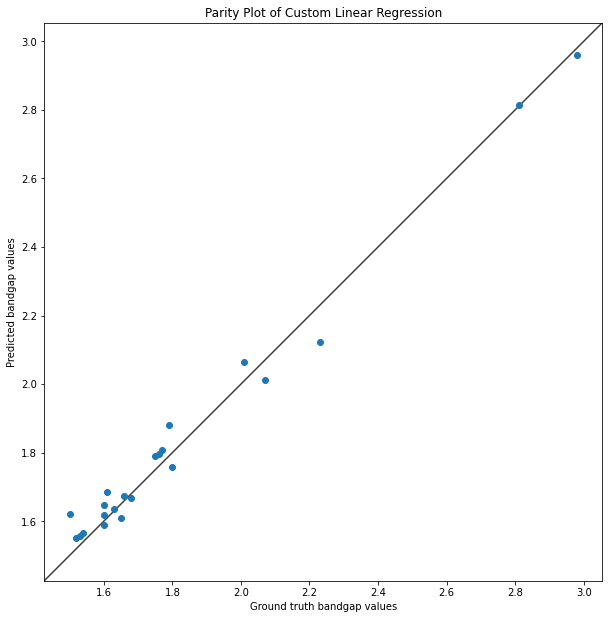

In [70]:
# Get the predictions of x_test into `y_pred`

#
# ...
#
y_pred = np.dot(x_test,par.T)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

* Ridge regression is used to reduce overfitting. An extra term $ \alpha|w|^2 $ is added to the loss function. This ensures that the parameter space is reduced which helps in reducing overfitting.

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

* Alpha is a control parameter which signifies how much importance should be given to the weights. If the alpha is too small the loss function depends mostly on the MSE loss which overfits the model. If alpha is too large to reduce loss function the weights are reduced drastically which underfits the model.

In [71]:
!pip install tabulate

In [72]:
# you should not have imported sklearn before this point
import pandas as pd
from tabulate import tabulate
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alphas = [0.0001,0.001,0.01,0.1,1,2,20,100,1000]
ridgermse_scores = np.zeros(len(alphas))
lassormse_scores = np.zeros(len(alphas))
ridge_lis = []
lasso_lis = []
for i in range(len(alphas)):   
    rregmodel = Ridge(alphas[i])
    rregmodel.fit(x_train, y_train) 
    testdatapred = rregmodel.predict(x_test)
#     print(np.sqrt(mean_squared_error(y_test,testdatapred)))
    ridgermse_scores[i] = np.sqrt(mean_squared_error(y_test,testdatapred))
    ridge_lis.append([alphas[i],ridgermse_scores[i]])

print(tabulate(ridge_lis,headers=['Alphas','Scores'],tablefmt='orgtbtl'))
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

   Alphas     Scores
---------  ---------
   0.0001  0.0524076
   0.001   0.0524552
   0.01    0.0529336
   0.1     0.0579142
   1       0.10718
   2       0.147329
  20       0.313887
 100       0.385871
1000       0.413936


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

* Lasso regression is used to reduce overfitting. An extra term  $ alpha.\sum{w} $  is added to the loss function. This ensures that the parameter space is reduced which helps in reducing overfitting.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

* Alpha is a control parameter which signifies how much importance should be given to the weights. If the alpha is too small the loss function depends mostly on the MSE loss which overfits the model. If alpha is too large to reduce loss function the weights are reduced drastically which underfits the model.Here the value remains almost the same for alpha greater than 5. As the $ \sum{w} $ is less compared to $ |w|^2 $ underfits for a smaller value of alpha.

In [73]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
for i in range(len(alphas)):   
    lmodel = Lasso(alphas[i])
    lmodel.fit(x_train, y_train) 
    testdatapredlm = lmodel.predict(x_test)
#     print(np.sqrt(mean_squared_error(y_test,testdatapredlm)))
    lasso_lis.append([alphas[i],np.sqrt(mean_squared_error(y_test,testdatapredlm))])
print(tabulate(lasso_lis,headers=['Alphas','Scores'],tablefmt='orgtbtl'))

   Alphas     Scores
---------  ---------
   0.0001  0.0525884
   0.001   0.0543784
   0.01    0.0888758
   0.1     0.397089
   1       0.41758
   2       0.41758
  20       0.41758
 100       0.41758
1000       0.41758
